# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : credit_card_default

## Objective : 

Mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

-   Mampu memperoleh data menggunakan BigQuery
-   Mampu memahami konsep supervised learning
-   Mampu mempersiapkan data untuk digunakan dalam model supervised learning
-   Mampu mengimplementasikan supervised learning dengan data yang diberikan
-   Mampu melakukan evaluasi model
-   Mampu melakukan model tuning

### 1a. SQL Query:
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 27902

---
# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [467]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
import warnings 



---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [468]:
#Data Loading from credit_card_default
df = pd.read_csv('h8dsft_P1M1_adnan_rio.csv')
df.head(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [469]:
#show tail data
df.tail(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [470]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [471]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.iloc[:,:15].describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000


In [472]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.iloc[:,16:].describe()

,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [473]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : default_payment_next_month

In [474]:
#melihat unique value padatarget (default_payment_next_month)
df_copy.default_payment_next_month.unique()

array([0, 1], dtype=int64)

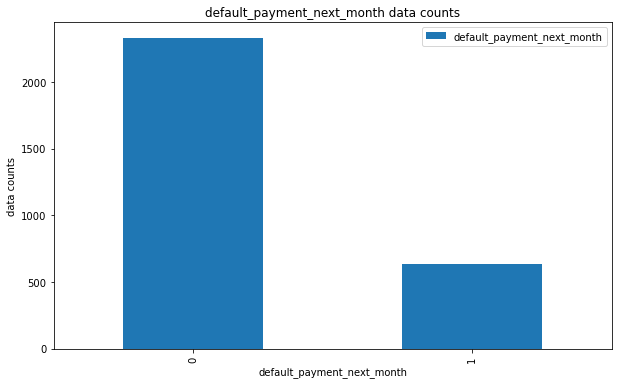

In [475]:
#groupby default_payment_next_month
df_copy.groupby(["default_payment_next_month"])[["default_payment_next_month"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('default_payment_next_month') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('default_payment_next_month data counts') # add title to the plot

plt.show()

Terjadi data imbalance pada kategori default payment next month = 1, sehingga ada kemungkinan model kurang mempelajari kategori ke 2 (def payment = 1) dan mengalami kesulitan dalam melakukan predict.

In [476]:
#membuat def perhitungan proportion, sebelum memasukkannya ke grafik
def make_dataplot_proportion(df3,grdf):
    col3 = []
    for i in df3.loc[:,0]:

        try:
            k = pd.Series.item(grdf.loc[i,0])
        except KeyError:
            k = 0
        
        try:
            b = pd.Series.item(grdf.loc[i,1])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    df3['proportion'] = col3
    pd.DataFrame(df3)

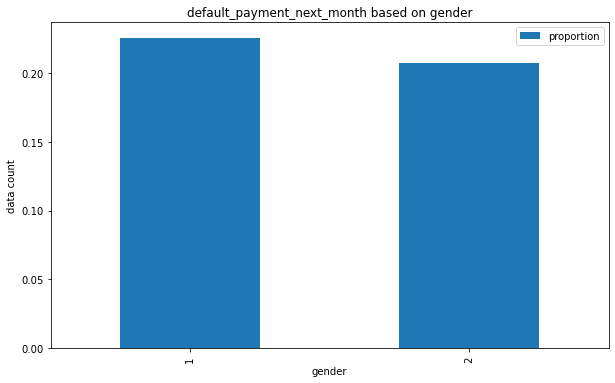

In [477]:
#hitung proportion berdasarkan sex(gender)
dataunique= pd.DataFrame(df_copy['sex'].unique())
gruopeddf = df_copy.groupby(['sex','default_payment_next_month'])[["default_payment_next_month"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'gender'}, inplace=True)
dataunique.set_index('gender', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('gender') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('default_payment_next_month based on gender') # add title to the plot

plt.show()

proporsi default payment = 1 dibanding keseluruhan data pergender, dapat terlihat bahwa tidak ada perbedaan signifikan antar gender. Sehingga terlihat tidak ada pengaruh dari gender terhadap keputusan default payment.

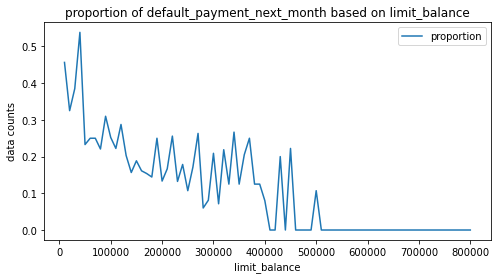

In [478]:
#hitung proportion berdasarkan limit balance
dataunique= pd.DataFrame(df_copy['limit_balance'].unique())
gruopeddf = df_copy.groupby(['limit_balance','default_payment_next_month'])[["default_payment_next_month"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'limit_balance'}, inplace=True)
dataunique = dataunique.sort_values(by='limit_balance', ascending=True)
dataunique.set_index('limit_balance', inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel('limit_balance') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of default_payment_next_month based on limit_balance') # add title to the plot
plt.show()

proporsi default payment = 1 per limit balance, dapat terlihat bahwa semakin rendah limit balance proporsi nasabah yang memiliki default paymemnt = 1 lebih banyak dibanding yang 0. Sehingga disimpulkan bahwa limit balance yang rendah membuat penentuan def payment menjadi lebih sensitif apabila terdapat transaksi yang tidak normal.

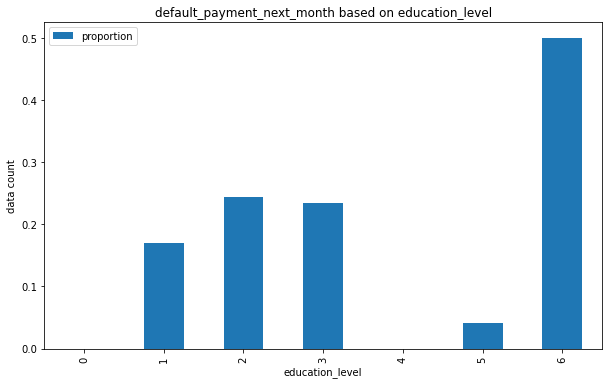

In [479]:
#hitung proportion berdasarkan education level
dataunique= pd.DataFrame(df_copy['education_level'].unique())
gruopeddf = df_copy.groupby(['education_level','default_payment_next_month'])[["default_payment_next_month"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'education_level'}, inplace=True)
dataunique = dataunique.sort_values(by='education_level', ascending=True)
dataunique.set_index('education_level', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('education_level') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('default_payment_next_month based on education_level') # add title to the plot

plt.show()

Arti dari setiap bar diatas adalah sebagai berikut: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), apabila kategori 6 digabung pada kategori 5 maka didapatkan bahwa ada perbedaan proporsi def payment = 1 yang signifikan dibanding education level lainnya. Sehingga education level dapat mempengaruhi keputusan default payment.

note: terdapat nilai 0 dan 4 (others) pada education_level, perlu adanya handling missing value dan gabungkan kategori 6 dan 5 dikarenakan sama.

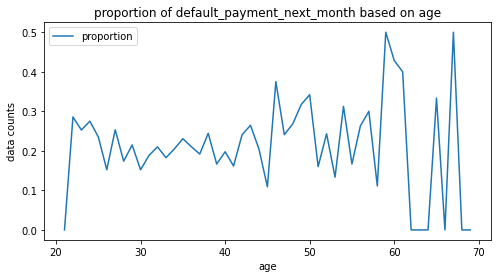

In [480]:
#hitung proportion berdasarkan age
dataunique= pd.DataFrame(df_copy['age'].unique())
gruopeddf = df_copy.groupby(['age','default_payment_next_month'])[["default_payment_next_month"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'age'}, inplace=True)
dataunique = dataunique.sort_values(by='age', ascending=True)
dataunique.set_index('age', inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel('age') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of default_payment_next_month based on age') # add title to the plot
plt.show()

Umur mempengaruhi keputusan default payment, dikarenakan proporsi pada usia 58-70 memiliki proporsi hampir setengah dari keseluruhan data pada usia tersebut.

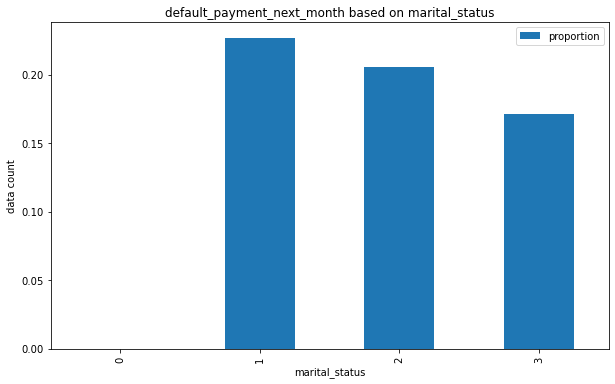

In [481]:
#hitung proportion berdasarkan marital status
dataunique= pd.DataFrame(df_copy['marital_status'].unique())
gruopeddf = df_copy.groupby(['marital_status','default_payment_next_month'])[["default_payment_next_month"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'marital_status'}, inplace=True)
dataunique = dataunique.sort_values(by='marital_status', ascending=True)
dataunique.set_index('marital_status', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('marital_status') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('default_payment_next_month based on marital_status') # add title to the plot

plt.show()

pengertian dari setiap kategori marital status adalah sebagai berikut: 1=married, 2=single, 3=others, dimana perbedaan proporsi def payment antar kategori marital status tidak jauh berbeda. Sehingga marital status tidak terlalu mempengaruhi keputusan default payment. 

terdapat value 0, sehingga apabila feature ini terpilih maka treat kategori 0 sebagai missing value

In [482]:
#copy dfcopy untuk membandingkan nilai pay, bill_atm dan payamt
df_mean = df_copy.copy()

In [483]:
#penggolongan data berdasarkan default payment next month
defaultpay1 = df_mean[(df_mean['default_payment_next_month'] == 1)]
defaultpay0 = df_mean[(df_mean['default_payment_next_month'] == 0)]

In [484]:
#describe kolom 5-1 dengan default payment = 0
defaultpay0.iloc[:,5:11].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,-0.202575,-0.300429,-0.312017,-0.342489,-0.378541,-0.399142
std,0.921194,1.012947,1.003250,1.004219,0.985974,1.010634
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,6.000000,8.000000,7.000000,7.000000


In [485]:
#describe kolom 5-1 dengan default payment = 1
defaultpay1.iloc[:,5:11].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.766929,0.530709,0.483465,0.392126,0.337008,0.275591
std,1.395975,1.485020,1.534347,1.536804,1.518488,1.503294
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


perbedaan yang jelas terlihat adalah rata-rata dari kedua kategori. Def paymeny = 0 memiliki mean bernilai negatif sedangkan def payment = 1 memiliki mean positif, menandakan bahwa peserta yang mengalami keterlambatan dalam pembayarannya cenderung memiliki def payment = 1. Sehingga penentuan kategori default payment dipengaruhi oleh kolom pay.

In [486]:
#describe kolom 11-17 dengan default payment = 0
defaultpay0.iloc[:,11:17].describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,52343.348069,50616.744635,48277.999142,44242.142060,40775.722318,39590.152361
std,71657.673301,70085.367410,67895.788090,62017.344751,57899.069439,57366.875789
min,-11545.000000,-67526.000000,-9850.000000,-27490.000000,-7941.000000,-73895.000000
25%,3830.250000,3153.500000,3096.750000,2369.000000,1762.000000,1296.250000
50%,24413.000000,22825.500000,21300.000000,19343.500000,18300.500000,17988.000000
75%,70468.750000,68082.250000,63727.250000,61304.250000,54064.000000,53043.750000
max,533142.000000,504834.000000,559712.000000,488808.000000,441981.000000,436172.000000


In [487]:
#describe kolom 17-23 dengan default payment = 0
defaultpay0.iloc[:,17:23].describe()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2330.000000,2.330000e+03,2330.000000,2330.000000,2330.000000,2330.000000
mean,7070.179399,7.165856e+03,5823.500429,4933.536481,5491.157940,5986.556652
std,22715.986557,3.236942e+04,15872.360902,13786.119780,18453.652701,18829.705506
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1212.250000,1.099250e+03,626.000000,391.750000,390.000000,327.000000
50%,2500.000000,2.481000e+03,2000.000000,1895.000000,1807.500000,1915.000000
75%,5842.000000,5.593000e+03,5000.000000,4500.000000,4516.750000,4725.500000
max,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Dari kedua tabel, didapatkan insight yang dapat digunakan dalam membandingkan dengan markdown berikutnya. Yaitu, mengenai kemampuan bayar. Pada peserta yang memiliki default payment = 0 penggunaan credit card berkisar 39ribu-52rb dengan kemampuan bayar 5 ribu sampai 7 ribu perbulannya.

In [488]:
#describe kolom 11-17 dengan default payment = 1
defaultpay1.iloc[:,11:17].describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,51292.557480,50768.069291,48099.437795,43530.267717,41617.867717,40444.259843
std,74791.258166,73351.573987,69108.870453,61547.969881,59661.726418,57110.365343
min,-200.000000,-474.000000,-25443.000000,-46627.000000,-46627.000000,-46627.000000
25%,4555.500000,4320.500000,4550.500000,3996.500000,2500.000000,2500.000000
50%,24003.000000,24181.000000,22231.000000,20508.000000,20085.000000,19439.000000
75%,66992.000000,63190.500000,60815.500000,55885.500000,50351.000000,50596.500000
max,613860.000000,512650.000000,578971.000000,384981.000000,395430.000000,384825.000000


In [489]:
#describe kolom 17-23 dengan default payment = 1
defaultpay1.iloc[:,17:23].describe()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,3702.329134,2994.491339,2681.051969,3195.811024,2792.908661,3166.981102
std,11611.265855,6038.941283,4586.480060,11141.089392,7246.092393,9305.447651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1925.000000,1710.000000,1500.000000,1039.000000,1247.000000,1000.000000
75%,3534.500000,3500.000000,3276.000000,3000.000000,3011.000000,3000.000000
max,235728.000000,84440.000000,46952.000000,159658.000000,109000.000000,100000.000000


Pada peserta yang memiliki default payment = 1 penggunaan credit card berkisar 41ribu-51rb namun dengan kemampuan bayar yang lebih rendah dibanding def payment - 0 yakni dengan hanya 2.6 ribu sampai 3.7 ribu saja perbulannya. Hampir setengah dari kemampuan bayar def payment = 0. Oleh karena itu disimmpulkan bahwa terdapat korelasi antar pay_amt dan bill_amt terhadap default payment.

In [490]:
#membuat kolom baru untuk melihat perbandingan antara def payment 1 dan 0 dari
#11:17 bill amt
#17:23 pay amt
#5:11 pay
billamt_mean = []
payamt_mean = []
pay_mean = []
bill_peramt = []

for i in df_mean.index:
    billamt_mean.append(np.round(df_mean.iloc[i,11:17].mean()))
    payamt_mean.append(np.round(df_mean.iloc[i,17:23].mean()))
    pay_mean.append(np.round(df_mean.iloc[i,5:11].sum()))

    pay = np.ceil(df_mean.iloc[i,17:23].mean())
    if pay == 0:
        pay = 1

    bill = np.ceil(df_mean.iloc[i,11:17].mean())
    if bill == 0:
        bill = 1
    
    bill_peramt.append(pay/bill)

df_mean['bill_mean']=billamt_mean
df_mean['payamt_mean']=payamt_mean
df_mean['pay_sum']=pay_mean
df_mean['pay_perbill']=bill_peramt

In [491]:
#Membagi def payment 0 dan 1
defpayment1 = df_mean[(df_mean['default_payment_next_month'] == 1)]
defpayment0 = df_mean[(df_mean['default_payment_next_month'] == 0)]

In [492]:
#simpan hasil perhitungan dalam variabel
dpay1 = defpayment1.iloc[:,24:].describe()
dpay0 = defpayment0.iloc[:,24:].describe()

In [493]:
#lakukan summary hasil perhitungan
pdall = pd.DataFrame(('bill_mean','payamt_mean','pay_sum','pay_perbill'))
pdall.rename(columns ={0:'parameter'},inplace=True)
pdall['defpay_0']=[0,0,0,0]
pdall['defpay_1']=[0,0,0,0]

pdall.loc[0,'defpay_0']= dpay0.loc['mean','bill_mean']
pdall.loc[1,'defpay_0']= dpay0.loc['mean','payamt_mean']
pdall.loc[2,'defpay_0']= dpay0.loc['mean','pay_sum']
pdall.loc[3,'defpay_0']= dpay0.loc['mean','pay_perbill']

pdall.loc[0,'defpay_1']= dpay1.loc['mean','bill_mean']
pdall.loc[1,'defpay_1']= dpay1.loc['mean','payamt_mean']
pdall.loc[2,'defpay_1']= dpay1.loc['mean','pay_sum']
pdall.loc[3,'defpay_1']= dpay1.loc['mean','pay_perbill']

pdall.set_index('parameter')
pdall

,parameter,defpay_0,defpay_1
0,bill_mean,45974.341202,45958.744882
1,payamt_mean,6078.465665,3088.925984
2,pay_sum,-1.935193,2.785827
3,pay_perbill,10.757676,0.683470


Perbandingan antara default payment 0 dan default payment 1. Dimana pay sum dominan positif pada defpay 1 yang menandakan rata-rata peserta credit card mengalami keterlambatan pembayaran. Sedangkan pay_perbill merupakan hasil pembagian pay dengan bill, untuk menunjukkan kemampuan bayar vs tagihannya, pada peserta defpay=1 rata-rata pay perbillnya bahkan lebih rendah daripada 1. Menunjukkan kemampuan membayar tagihan yang lebih rendah daripada tagihannya.

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [494]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy.sample(30, random_state = 15)
df_inf.shape

(30, 24)

In [495]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 2965:
df_trts.shape

(2935, 24)

In [496]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [497]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('default_payment_next_month', axis = 1)
y = df_trts['default_payment_next_month']

In [498]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [499]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (2348, 23)
Test set size:  (587, 23)


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [500]:
#Display X_train to see the features
X_train.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
137,360000,1,1,1,36,0,0,0,0,0,...,33788,36491,41179,45823,3000,3000,3000,5000,5000,5000
490,20000,1,3,3,57,0,0,2,0,0,...,20141,19888,20318,20364,2000,1200,1300,1000,1000,1000
348,170000,1,1,2,27,0,0,0,0,0,...,133090,130937,134043,137023,5631,5090,4937,5043,5023,11939
1405,20000,1,3,2,32,0,0,0,0,2,...,6369,6891,6635,7287,1092,1106,628,0,762,0
1576,210000,2,4,2,25,0,0,0,0,-2,...,5259,-243,-243,-243,3151,2000,0,0,0,0


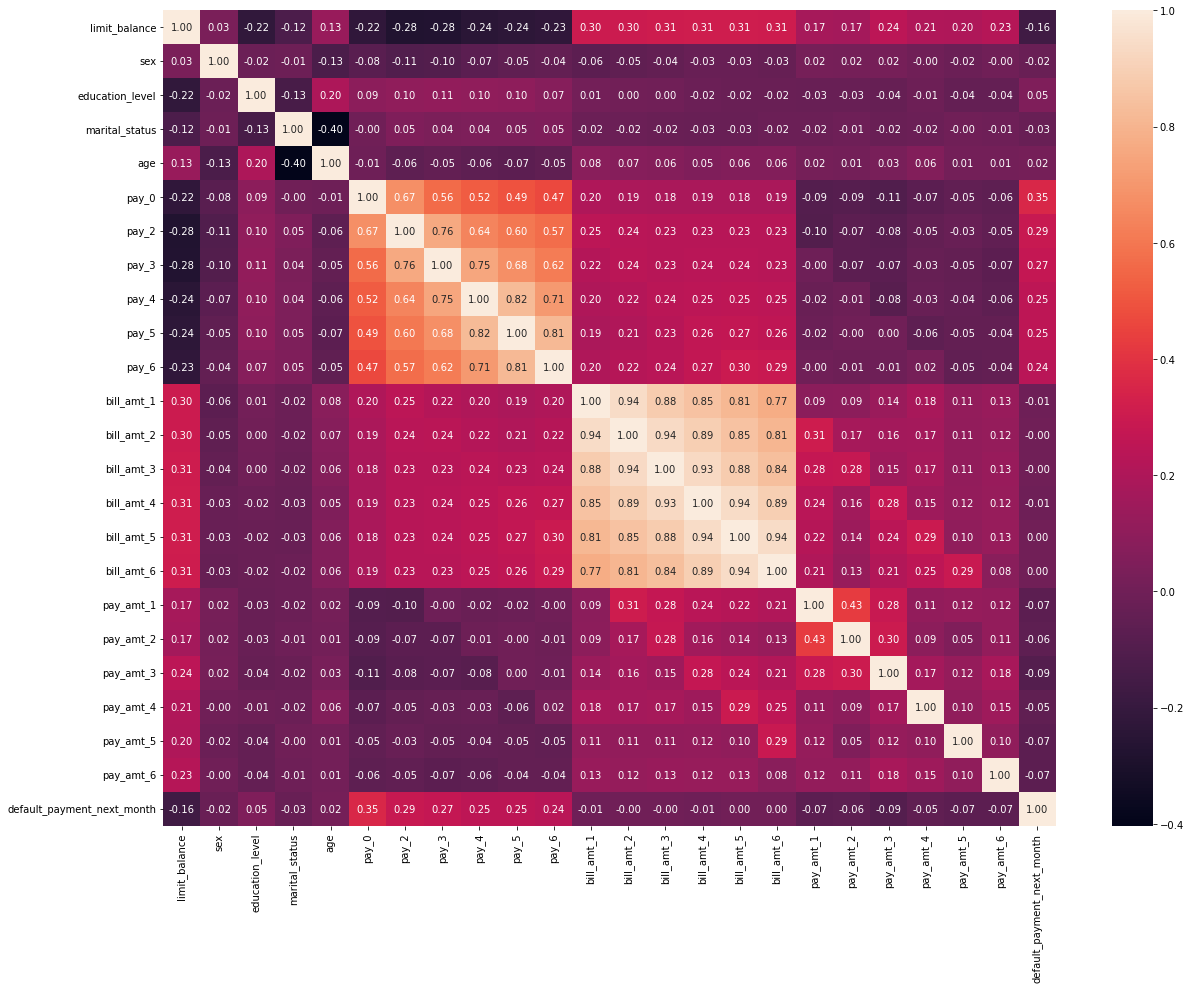

In [501]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap ini dapat terlihat banyak kolom yang mempunyai korelasi dengan 'default_payment_next_month', namun beberapa kolom memiliki korelasi yang rendah. Beberapa kolom itu adalah sex(gender), marital_status dan age. Dari segi EDA juga kedua kolom ini tidak didukung memiliki korelasi bagi 'default_payment_next_month'.
Lanjut ke random forest classifier (feature importance) untuk mencari data pendukung tambahan

In [502]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_train,y_train)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train.columns)
scorepercolumn.sort_values(ascending=False)

pay_0              0.113000
age                0.060404
limit_balance      0.055330
bill_amt_1         0.053085
pay_2              0.050854
bill_amt_4         0.048727
pay_amt_1          0.048588
pay_amt_2          0.048142
bill_amt_2         0.047999
pay_amt_6          0.047703
bill_amt_6         0.047387
bill_amt_5         0.046353
pay_amt_3          0.044868
bill_amt_3         0.044840
pay_amt_4          0.042602
pay_amt_5          0.042555
pay_3              0.033578
pay_6              0.028226
pay_4              0.026174
pay_5              0.025303
education_level    0.018292
marital_status     0.014021
sex                0.011969
dtype: float64

melihat age memiliki nilai feature importance yang tinggi maka diputuskan untuk memasukkan data ke feature selected

In [503]:
#Keep only featurs that selected

X_train_fs = X_train.loc[:,['age','limit_balance', 'education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']]
X_test_fs = X_test.loc[:,['age','limit_balance', 'education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']]
X_test_fs.head(3)

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
401,40,50000,2,0,0,0,0,0,0,50066,...,9762,8620,9303,8693,1450,1500,400,1000,1000,2000
1230,49,150000,2,0,0,0,0,0,0,151822,...,75782,76333,77956,77553,2985,2700,5000,2823,2865,2679
1037,24,70000,2,0,0,0,0,0,0,49169,...,49864,48481,46946,47958,1840,1744,2001,2000,1800,1706


## Missing value handling

In [504]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [505]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [506]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [507]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

Mengingat pada kolom feature education_level terdapat nilai 0 yang tidak diketahui serta 5 yang memiliki nilai yang sama dengan 6 (sama-sama others). Nilai 0 akan di handle sebagai missing value sedangkan 5 dan 6 akan digabung dalam 1 feature yakni 5.

In [508]:
#Cari nilai 0 pada education level Xtrain
X_train_fs[(X_train_fs['education_level'] == 0)]

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2079,35,250000,0,-2,-2,-2,-2,-2,-2,22839,...,12035,33604,0,1190,7783,12046,33718,0,1190,590


Dikarenakan nilai 0 hanya terdapat 1 pada train maka diputuskan untuk drop data tersebut. Lakukan juga pada dataset test

In [509]:
#drop nilai
X_train_fs.drop(index = 2079 , inplace = True)
y_train.drop(index = 2079 , inplace = True)

In [510]:
#nilai 0 sudah tidak ada pada education level train dataset
X_train_fs[(X_train_fs['education_level'] == 0)]

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6


In [511]:
#Cari nilai 0 pada education level Xtest
X_test_fs[(X_test_fs['education_level'] == 0)]

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1557,37,100000,0,0,0,-2,-2,-2,-2,7642,...,0,0,0,0,0,0,0,0,0,0


In [512]:
#drop nilai pada test
X_test_fs.drop(index = 1557 , inplace = True)
y_test.drop(index = 1557 , inplace = True)

In [513]:
#nilai 0 sudah tidak ada pada education level train dataset
X_test_fs[(X_test_fs['education_level'] == 0)]

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6


Handling missing value berlanjut kepada penggabungan kategori 5 dan 6. Ganti kategori 6 ke kategori 5.

In [514]:
#penggantian value 6 ke 5, lakukan juga kepada test
trained5 = X_train_fs[(X_train_fs['education_level'] == 6)]
X_train_fs.education_level[trained5.index] = 5

tested5 = X_test_fs[(X_test_fs['education_level'] == 6)]
X_test_fs.education_level[tested5.index] = 5

In [515]:
X_test_fs[(X_test_fs['education_level'] == 6)]

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6


## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [516]:
X_train_fs

,age,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
137,36,360000,1,0,0,0,0,0,0,28291,...,33788,36491,41179,45823,3000,3000,3000,5000,5000,5000
490,57,20000,3,0,0,2,0,0,0,19071,...,20141,19888,20318,20364,2000,1200,1300,1000,1000,1000
348,27,170000,1,0,0,0,0,0,0,127902,...,133090,130937,134043,137023,5631,5090,4937,5043,5023,11939
1405,32,20000,3,0,0,0,0,2,2,4338,...,6369,6891,6635,7287,1092,1106,628,0,762,0
1576,25,210000,4,0,0,0,0,-2,-2,179248,...,5259,-243,-243,-243,3151,2000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,33,490000,1,-1,2,-1,0,0,0,59016,...,24307,21136,24758,21817,0,24307,12396,13000,10000,88
2715,37,230000,1,-1,-1,-1,-1,-1,-1,3102,...,5711,5770,7652,17825,30580,5739,5799,7690,17914,360
2204,31,230000,1,-2,-2,-2,-2,-2,-2,-7,...,0,147,0,0,6792,0,147,0,0,176
2432,23,20000,1,-1,-1,0,0,0,0,6916,...,10130,6165,6165,6315,14000,1145,950,0,150,6000


In [517]:
#Memilih feature numerical dan categorical

num_col = ['age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
cat_col = ['limit_balance', 'education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [518]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train_fs[num_col]
X_train_cat = X_train_fs[cat_col]

X_test_num = X_test_fs[num_col]
X_test_cat = X_test_fs[cat_col]

In [519]:
#show Xtrain num
X_train_num.head(3)

,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
137,36,28291,31055,33788,36491,41179,45823,3000,3000,3000,5000,5000,5000
490,57,19071,20442,20141,19888,20318,20364,2000,1200,1300,1000,1000,1000
348,27,127902,131631,133090,130937,134043,137023,5631,5090,4937,5043,5023,11939


In [520]:
#show Xtrain cat
X_train_cat.head(3)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
137,360000,1,0,0,0,0,0,0
490,20000,3,0,0,2,0,0,0
348,170000,1,0,0,0,0,0,0


## Outliers handling

In [521]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() >= -0.5 ) | (df[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

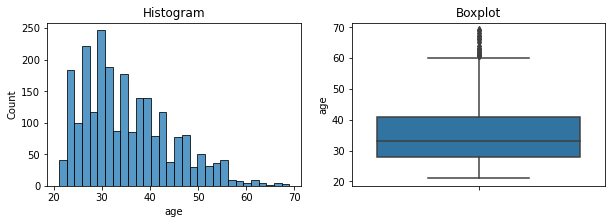

skewness: 0.7661814362617376
the distribution is skewed


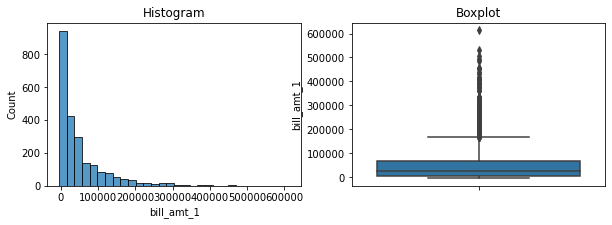

skewness: 2.5611576513433247
the distribution is skewed


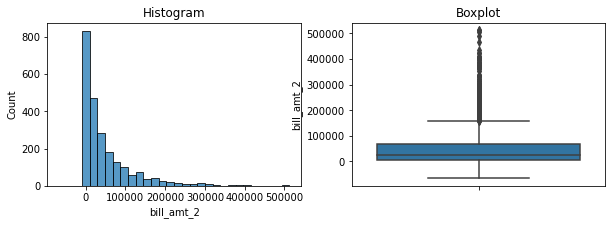

skewness: 2.5053636807117026
the distribution is skewed


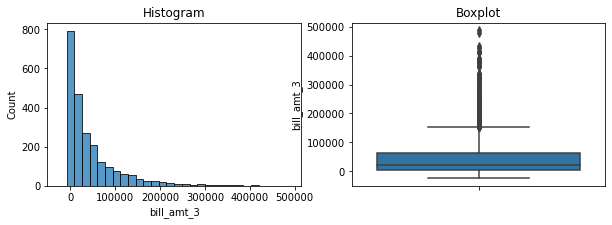

skewness: 2.4899317867370905
the distribution is skewed


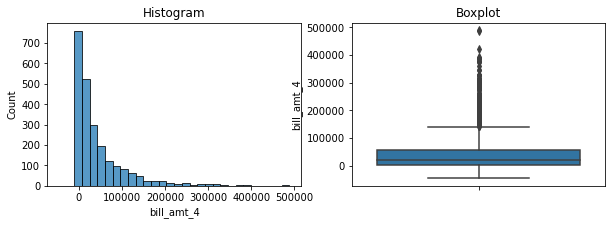

skewness: 2.537282727306119
the distribution is skewed


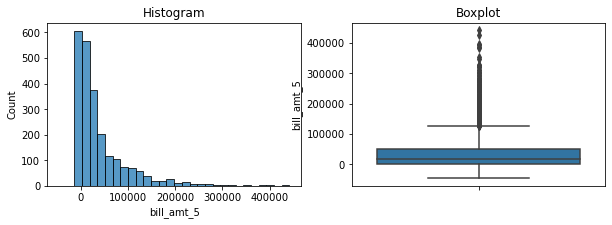

skewness: 2.486150471966471
the distribution is skewed


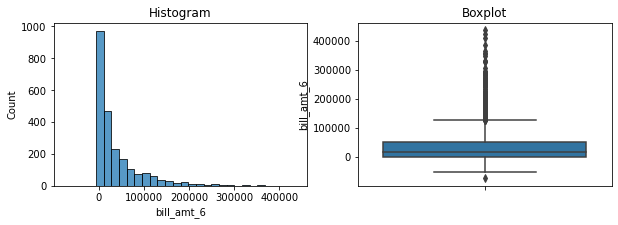

skewness: 2.4764063455367586
the distribution is skewed


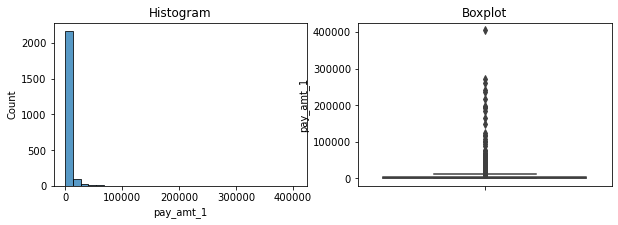

skewness: 10.905097373367813
the distribution is skewed


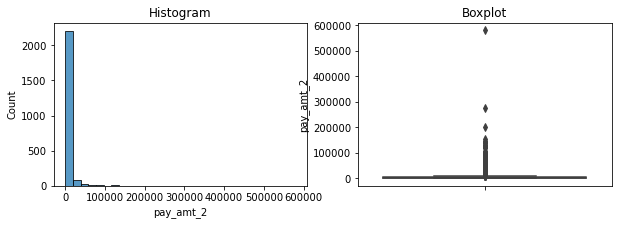

skewness: 15.536878901067142
the distribution is skewed


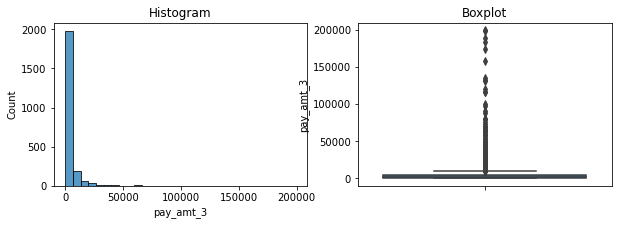

skewness: 8.063517980859116
the distribution is skewed


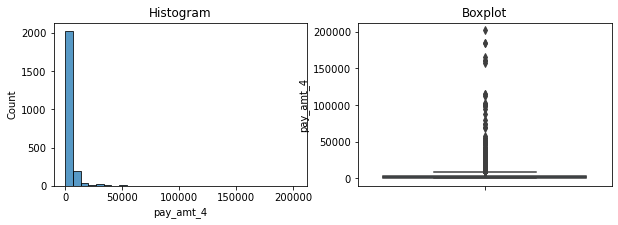

skewness: 8.417709952408899
the distribution is skewed


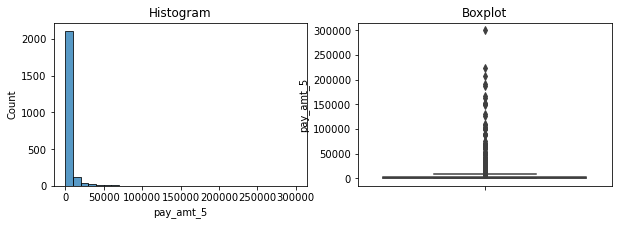

skewness: 9.359968668824118
the distribution is skewed


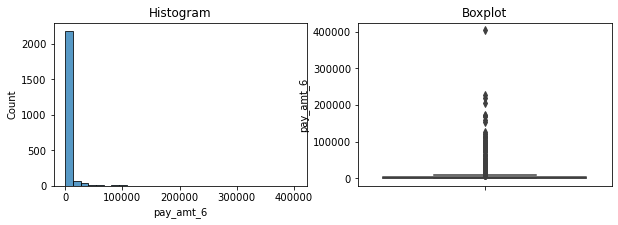

skewness: 9.391774544873405
the distribution is skewed


In [522]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
hist_boxplot(X_train_num, 'age')

hist_boxplot(X_train_num, 'bill_amt_1')
hist_boxplot(X_train_num, 'bill_amt_2')
hist_boxplot(X_train_num, 'bill_amt_3')
hist_boxplot(X_train_num, 'bill_amt_4')
hist_boxplot(X_train_num, 'bill_amt_5')
hist_boxplot(X_train_num, 'bill_amt_6')

hist_boxplot(X_train_num, 'pay_amt_1')
hist_boxplot(X_train_num, 'pay_amt_2')
hist_boxplot(X_train_num, 'pay_amt_3')
hist_boxplot(X_train_num, 'pay_amt_4')
hist_boxplot(X_train_num, 'pay_amt_5')
hist_boxplot(X_train_num, 'pay_amt_6')

Semua data memiliki distribusi skewed, namun dianggap sebagai natural outlier karena age bisa saja pesertanya memang memiliki usia yang tingggi dan untuk pay dan bill wajar jika terjadi outlier.

## Cardinality



Lakukan cardinality apabila diperlukan pada category dataset

In [523]:
X_train_cat.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
137,360000,1,0,0,0,0,0,0
490,20000,3,0,0,2,0,0,0
348,170000,1,0,0,0,0,0,0
1405,20000,3,0,0,0,0,2,2
1576,210000,4,0,0,0,0,-2,-2


In [524]:
#hitung banyaknya jumlah kategori pada limit balance
len(X_train_cat.limit_balance.unique())

59

In [525]:
#hitung banyaknya jumlah kategori pada limit balance
len(X_test_cat.limit_balance.unique())

47

Jumlah kategori dalam limit balance masih tinggi, maka lakukan cardinality untuk menurunkan kategori ini dengan cara membagi nya dengan 100000 dan melakukan round up

In [526]:
#Matikan warnings
warnings.filterwarnings('ignore')

In [527]:
#Salin dataset ke variable baru sebelum cardinality
X_train_cat_car = X_train_cat.copy()
X_test_cat_car = X_test_cat.copy()


#Buat kolom baru berisi kolom limit balance reduced
X_train_cat_car['limbal_reduced'] = np.ceil(X_train_cat_car['limit_balance']/100000)
X_test_cat_car['limbal_reduced'] = np.ceil(X_test_cat_car['limit_balance']/100000)

In [528]:
#hitung kembali banyaknya kategori pada limit balance
len(X_train_cat_car.limbal_reduced.unique())

8

In [529]:
#drop kolom lama
X_train_cat_car.drop('limit_balance', axis = 1,inplace=True)
X_test_cat_car.drop('limit_balance', axis = 1,inplace=True)

Banyaknya kategori limit balance X_train menjadi lebih kecil dari 59 menjadi 8, test dari 47 menjadi 6. Cardinality berhasil dilakukan. Lanjutkan kepada feature scaling

## Feature Scaling

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dikarenakan semua feature yang terdapat dalam numerik memiliki distribusi skewed.

## Feature Encoding

Encoding akan dilakukan dengan menggunakan pipeline bersama scaling, menggunakan onehotencoder dan ordinalencoder. Nominal = education_level. Sedangkan ordinal = limit_balance, pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limbal_reduced yang selanjutnya akan di ignore karena formatnya yang siap pakai ke model.

## Concate between Numerical Columns and Categorical Columns

In [530]:
#Satukan kedua dataset train dan test dari num dan category
X_train_fin = pd.concat([X_train_num, X_train_cat_car], axis=1)
X_test_fin = pd.concat([X_test_num, X_test_cat_car], axis=1)
X_train_fin

,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,...,pay_amt_5,pay_amt_6,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limbal_reduced
137,36,28291,31055,33788,36491,41179,45823,3000,3000,3000,...,5000,5000,1,0,0,0,0,0,0,4.0
490,57,19071,20442,20141,19888,20318,20364,2000,1200,1300,...,1000,1000,3,0,0,2,0,0,0,1.0
348,27,127902,131631,133090,130937,134043,137023,5631,5090,4937,...,5023,11939,1,0,0,0,0,0,0,2.0
1405,32,4338,5355,6369,6891,6635,7287,1092,1106,628,...,762,0,3,0,0,0,0,2,2,1.0
1576,25,179248,21612,5259,-243,-243,-243,3151,2000,0,...,0,0,4,0,0,0,0,-2,-2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,33,59016,16355,24307,21136,24758,21817,0,24307,12396,...,10000,88,1,-1,2,-1,0,0,0,5.0
2715,37,3102,30428,5711,5770,7652,17825,30580,5739,5799,...,17914,360,1,-1,-1,-1,-1,-1,-1,3.0
2204,31,-7,6785,0,147,0,0,6792,0,147,...,0,176,1,-2,-2,-2,-2,-2,-2,3.0
2432,23,6916,13914,10130,6165,6165,6315,14000,1145,950,...,150,6000,1,-1,-1,0,0,0,0,1.0


---
# 6. Model definition

Notes :

Algoritma yang akan dipakai adalah:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- BaggingClassifier
- AdaBoost

proses yang dilalui adalah cross validation untuk mencari algoritma base terbaik, lalu dilanjutkan dengan grid search untuk mencari hyperparameter terbaik. 

Dengan metrics yang akan dipakai untuk mengevaluasi adalah accuracy_score,classification_report untuk mengetahui recall, precision, dan nilai akurasi.

In [531]:
#state num dan cat cols, serta bagi cat cols menjadi ordinal dan nominal
num_skewcols = ['age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2','pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_nomcols = ['education_level']
cat_none =['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','limbal_reduced']

In [532]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcols),
    ('catnom', OneHotEncoder(),cat_nomcols),
    ('catord', 'passthrough',cat_none)
])

minmax scaler digunakan untuk data numeric skew, one hot encoder digunakan untuk nominal category dan passthrough digunakan untuk ordinal category dikarenakan data tersebut sudah dalam bentuk yang sederhana sehingga dicoba untuk tidka menggunakan encoding.

In [533]:
#persiapkan pipeline LogisticRegression
prepmod_logreg = Pipeline([('preprop', preprocess),('LogReg', LogisticRegression())])

In [534]:
#persiapkan pipeline SVM
prepmod_SVC = Pipeline([('preprop', preprocess),('SVC', SVC())])


In [535]:
#persiapkan pipeline DecisionTree
prepmod_DT = Pipeline([('preprop', preprocess),('DT', DecisionTreeClassifier())])

In [536]:
#persiapkan pipeline RandomForestClassifier
prepmod_RF = Pipeline([('preprop', preprocess),('RFC', RandomForestClassifier())])

In [537]:
#persiapkan pipeline KNeighborsClassifier
prepmod_KNN = Pipeline([('preprop', preprocess),('KNN', KNeighborsClassifier())])

In [538]:
#persiapkan pipeline GaussianNB
prepmod_NB = Pipeline([('preprop', preprocess),('NB', GaussianNB())])

In [539]:
##persiapkan pipeline BaggingClassifier
prepmod_BC = Pipeline([('preprop', preprocess),('BC', BaggingClassifier())])

In [540]:
##persiapkan pipeline AdaBoostClassifier
prepmod_AB = Pipeline([('preprop', preprocess),('AB', AdaBoostClassifier())])

---
# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

---
# 8. Model Evaluation

In [541]:
#buat dataframe untuk menampung hasil evaluasi
resulteval = pd.DataFrame(('LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB','BaggingClassifier','AdaBoostClassifier'))
resulteval.rename(columns ={0:'model'},inplace=True)
resulteval['mean']=[0,0,0,0,0,0,0,0]
resulteval['stddev']=[0,0,0,0,0,0,0,0]
resulteval['acc_train']=[0,0,0,0,0,0,0,0]
resulteval['acc_test']=[0,0,0,0,0,0,0,0]
resulteval

,model,mean,stddev,acc_train,acc_test
0,LogisticRegression,0,0,0,0
1,SVC,0,0,0,0
2,DecisionTreeClassifier,0,0,0,0
3,RandomForestClassifiert,0,0,0,0
4,KNeighborsClassifier,0,0,0,0
5,GaussianNB,0,0,0,0
6,BaggingClassifier,0,0,0,0
7,AdaBoostClassifier,0,0,0,0


### Logistic regression

##### Lakukan eval untuk logistic regression

In [542]:
model = prepmod_logreg
post = 0
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

prepmod_logreg.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### SVC

##### Lakukan eval untuk SVC

In [543]:
model = prepmod_SVC
post = 1
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### Decision Tree

In [544]:
#Lakukan eval untuk decision tree
model = prepmod_DT
post = 2
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### Random forest

In [545]:
#Lakukan eval untuk random forest
model = prepmod_RF
post = 3
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### KNN

In [546]:
#Lakukan eval untuk KNN
model = prepmod_KNN
post = 4
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### Naive Bayes

In [547]:
#Lakukan eval untuk random naive bayes
model = prepmod_NB
post = 5
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### BaggingClassifier

In [548]:
#Lakukan eval untuk BaggingClassifier
model = prepmod_BC
post = 6
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

### ADA Boost

In [549]:
#Lakukan eval untuk adaboost
model = prepmod_AB
post = 7
a = np.mean(cross_val_score(model,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train)
acc_train = accuracy_score(y_train,model.predict(X_train_fin))
acc_test = accuracy_score(y_test,model.predict(X_test_fin))

resulteval.loc[post,'mean']=a
resulteval.loc[post,'stddev']=b
resulteval.loc[post,'acc_train']=acc_train
resulteval.loc[post,'acc_test']=acc_test

In [550]:
#tampilkan hasil evaluasi
resulteval

,model,mean,stddev,acc_train,acc_test
0,LogisticRegression,0.824012,0.014988,0.828291,0.822526
1,SVC,0.831671,0.021731,0.844482,0.837884
2,DecisionTreeClassifier,0.723026,0.018690,0.999148,0.733788
3,RandomForestClassifiert,0.821460,0.022179,0.999148,0.836177
4,KNeighborsClassifier,0.815070,0.018899,0.853430,0.812287
5,GaussianNB,0.327663,0.016651,0.330635,0.312287
6,BaggingClassifier,0.809531,0.018825,0.976992,0.807167
7,AdaBoostClassifier,0.828267,0.017714,0.845761,0.834471


Dilihat dari mean dan std dev setiap model, maka diambil keputusan bahwa model base terbaik adalah LogReg dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik menandakan bahwa model memiliki sifat robust, terlebih Log Reg juga menunjukkan accuracy score yang tidak jauh berbeda antara train test (good fit).

Berikut adalah model yang termasuk good fit, overfit, dan underfit:
- Good fit: LogReg, SVM, KNN, AdaB
- Overfit : DT, RF, BC
- Underfit: NB
- Diantara model goodfit, model yang memiliki mean tinggi serta std dev yang kecil adalah Log Reg. Sehingga best base model yang akan diambil yakni Logistic regression.

In [551]:
#buat parameter grid bagi logreg
param_gridLogReg = [{'LogReg__penalty': ['none','l1','l2','elasticnet'],
               'LogReg__C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
               'LogReg__class_weight': ['balanced', 'None'],
               'LogReg__max_iter': [100, 500 ,1000]}]

beberapa parameter yang diambil adalah random_state, C, class_weight, dan max iter. C diambil untuk melihat nilai regularization, weighted factor, banyaknya iteration maksimum yang dibutuhkan untuk converge dan random state terbaik untuk model ini.

In [552]:
#buat grid search lalu fit
tune_logreg = GridSearchCV(prepmod_logreg, param_gridLogReg, cv=5)
tune_logreg.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bill_amt_1',
                                                                          'bill_amt_2',
                                                                          'bill_amt_3',
                                                                          'bill_amt_4',
                                                                          'bill_amt_5',
                                                                          'bill_amt_6',
                                                                          'pay_amt_1',
                                                             

In [553]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(tune_logreg.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['age', 'bill_amt_1',
                                                   'bill_amt_2', 'bill_amt_3',
                                                   'bill_amt_4', 'bill_amt_5',
                                                   'bill_amt_6', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('catnom', OneHotEncoder(),
                                                  ['education_level']),
                                                 ('catord', 'passthrough',
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                 

In [554]:
#print coefficient
print("Logistic regression coefficients:\n{}".format(
      tune_logreg.best_estimator_.named_steps["LogReg"].coef_))

Logistic regression coefficients:
[[ 6.84841752e-01 -6.98517107e+00  8.42046961e+00 -2.01357909e+00
  -9.32488739e-01 -3.29744780e+00  3.95038970e+00 -7.99742071e+00
  -1.04932502e+01 -3.54696463e+00  5.55281135e-01 -4.03076303e+00
  -2.53597006e+00  6.65698966e-01  8.31198675e-01  6.94960459e-01
  -5.61587166e+00  4.53960156e-01  6.70448390e-01  3.62705494e-02
   6.56603628e-02 -8.77487694e-03  1.62711658e-01  4.44423849e-02
  -1.37252785e-02]]


berikut adalah coefficient dari tiap feature yang terpilih, education level terpecah menjadi 5 kolom dikarenakan One Hot encoder yang memecah feature ini sejumlah banyaknya kategori.

In [555]:
#print best parameters
print("Best parameters: {}".format(tune_logreg.best_params_))

Best parameters: {'LogReg__C': 0.5, 'LogReg__class_weight': 'None', 'LogReg__max_iter': 500, 'LogReg__penalty': 'none'}


Best parameter logreg yang didapatkan dari grid search yakni: C=0.5, class weight = none, maximum iteration = 500, dan log reg penalty yakni none.

In [556]:
#print grid score
print("Test-set score: {:.2f}".format(tune_logreg.score(X_train_fin,y_train)))

Test-set score: 0.83


In [557]:
#lakukan predict menggunakan best parameter
y_train_pred = tune_logreg.best_estimator_.predict(X_train_fin)
y_test_pred = tune_logreg.best_estimator_.predict(X_test_fin)

In [558]:
#lakukan predict untuk base parameter
y_train_pred_base = prepmod_logreg.predict(X_train_fin)
y_test_pred_base = prepmod_logreg.predict(X_test_fin)

Bandingkan hasil accuracy score antara best parameter dengan base parameter

In [559]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.8278653600340861
accuracy score test :  0.8276450511945392


In [560]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train,y_train_pred_base))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred_base))

accuracy score train :  0.8282914358755858
accuracy score test :  0.8225255972696246


dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dengan perbedaan atara train dan test lebih kecil dibanding base parameter.

Lanjutkan dengan mambandingkan hasil classification report antara best parameter dengan base parameter

In [561]:
#print classification report best param
print('Classification Report (Logistic Regression With Hyperparameter Tuning In Data Train)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_train,y_train_pred))
print('Classification Report (Logistic Regression With Hyperparameter Tuning In Data Test)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_test,y_test_pred))

Classification Report (Logistic Regression With Hyperparameter Tuning In Data Train)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1843
           1       0.74      0.30      0.43       504

    accuracy                           0.83      2347
   macro avg       0.79      0.64      0.66      2347
weighted avg       0.82      0.83      0.80      2347

Classification Report (Logistic Regression With Hyperparameter Tuning In Data Test)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       461
           1       0.75      0.29      0.42       125

    accuracy                           0.83       586
   macro avg       0.79      0.63      0.66       586
weighted avg       0.82      0.83      0.80       586



In [562]:
#print classification report base param
print('Classification Report (Logistic Regression Data Train)')
print('------------------------------------------------------\n')
print(classification_report(y_train,y_train_pred_base))
print('Classification Report (Logistic Regression Data Test)')
print('------------------------------------------------------\n')
print(classification_report(y_test,y_test_pred_base))

Classification Report (Logistic Regression Data Train)
------------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1843
           1       0.75      0.30      0.43       504

    accuracy                           0.83      2347
   macro avg       0.79      0.64      0.66      2347
weighted avg       0.82      0.83      0.80      2347

Classification Report (Logistic Regression Data Test)
------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       461
           1       0.71      0.28      0.40       125

    accuracy                           0.82       586
   macro avg       0.77      0.62      0.65       586
weighted avg       0.81      0.82      0.79       586



selain dari accuracy score yang menunjukkan best parameter memiliki performa lebih baik, dari classification report juga terlihat bahwa best parameter memiliki nilai recall yang lebih baik dengan perbedaan antara train dan test lebih kecil dibanding base parameter, nilai ini mendukung keputusan bahwa model terbaik untuk model ini adalah Log Reg dengan best parameter. Nilai recall menjadi fokus untuk meningkatkan persentase mendeteksi fraud diantara yang benar-benar merupakan fraud. Nilai recall yang kecil wajar terjadi karena adanya data imbalance terutama pada kategori 1, model tidak memiliki banyak data untuk dipelajari sehingga besar kemungkinan terjadi missprediction. 

---
# 9. Model Inference

In [563]:
df_inf.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,90000,2,2,1,25,-1,-1,0,0,0,...,43380,46632,14177,93788,10000,33000,5300,5000,2913,0
1,110000,1,2,2,29,0,0,0,0,0,...,111771,111703,111864,4000,4300,4164,4500,4200,5000,0
2,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


In [564]:
df_inf_copy = df_inf.copy()

In [565]:
# Looking missing value in X_train
df_inf_copy.isnull().sum().sum()

0

In [566]:
#Cari nilai 0 pada education level Xtrain
df_inf_copy[(df_inf_copy['education_level'] == 0)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month


In [567]:
#Cari nilai 0 pada education level Xtrain
df_inf_copy[(df_inf_copy['education_level'] == 6)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month


In [568]:
#Buat kolom baru berisi kolom limit balance reduced untuk cardinality
df_inf_copy['limbal_reduced'] = np.ceil(df_inf_copy['limit_balance']/100000)
df_inf_copy['limbal_reduced'] = np.ceil(df_inf_copy['limit_balance']/100000)

In [569]:
#hapus kolom limit balance setelah cardinality
df_inf_copy.drop('limit_balance', axis = 1,inplace=True)

In [570]:
df_inf_copy.head(3)

,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,limbal_reduced
0,2,2,1,25,-1,-1,0,0,0,0,...,46632,14177,93788,10000,33000,5300,5000,2913,0,1.0
1,1,2,2,29,0,0,0,0,0,0,...,111703,111864,4000,4300,4164,4500,4200,5000,0,2.0
2,1,2,2,38,0,0,0,0,0,0,...,18246,18642,1300,1600,650,700,700,700,0,1.0


In [571]:
#Lakukan predict pada data infers
y_inf_pred_best = tune_logreg.best_estimator_.predict(df_inf_copy)

In [572]:
# Create Dataframe columns=['defpayment_predicted'])
y_inf_pred_best_df= pd.DataFrame(y_inf_pred_best , columns=['defpayment_predicted'])

# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf_copy, y_inf_pred_best_df ], axis=1)
df_inf_bestparam.head(3)

,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,limbal_reduced,defpayment_predicted
0,2,2,1,25,-1,-1,0,0,0,0,...,14177,93788,10000,33000,5300,5000,2913,0,1.0,0
1,1,2,2,29,0,0,0,0,0,0,...,111864,4000,4300,4164,4500,4200,5000,0,2.0,0
2,1,2,2,38,0,0,0,0,0,0,...,18642,1300,1600,650,700,700,700,0,1.0,0


In [573]:
#compare prediction result and actual data
df_inf_bestparam[['default_payment_next_month','defpayment_predicted']]

,default_payment_next_month,defpayment_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


4 data dari 30 sample data mengalami salah prediksi dengan menggunakan Log Reg dengan best parameters, hasil prediksi ini menunjukkan ketepatan prediksi pada data inference sebesar 86.7%.

---
# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
- Terjadi data imbalance pada kategori default payment next month = 1, sehingga ada kemungkinan model kurang mempelajari kategori ke 2 (def payment = 1) dan mengalami kesulitan dalam melakukan predict.
- Beberapa kolom yang memiliki potensi mempengaruhi def payment yakni: limit balance, education level, age, pay. bill amt, dan pay amt . Sedangkan yang tidak yaitu gender, dan marital status. 
- Pada peserta yang memiliki default payment = 0 penggunaan credit card berkisar 39ribu-52rb dengan kemampuan bayar 5 ribu sampai 7 ribu perbulannya. Pada peserta yang memiliki default payment = 1 penggunaan credit card berkisar 41ribu-51rb namun dengan kemampuan bayar yang lebih rendah dibanding def payment - 0 yakni dengan hanya 2.6 ribu sampai 3.7 ribu saja perbulannya. Terdapat korelasi antar pay_amt dan bill_amt terhadap default payment.
- Perbandingan antara default payment 0 dan default payment 1. Dimana pay sum dominan positif pada defpay 1 yang menandakan rata-rata peserta credit card mengalami keterlambatan pembayaran. 
- Pada peserta defpay=1 rata-rata pay perbillnya bahkan lebih rendah daripada 1. Menunjukkan kemampuan membayar tagihan yang lebih rendah daripada tagihannya.

Dari process feature selection:
- Heatmap: Dari heatmap yerlihat banyak kolom yang mempunyai korelasi dengan 'default_payment_next_month', namun beberapa kolom memiliki korelasi yang rendah. Beberapa kolom itu adalah sex(gender), marital_status dan age. Dari segi EDA juga kedua kolom ini tidak didukung memiliki korelasi bagi 'default_payment_next_month'.
- Feature importance: age memiliki nilai feature importance yang tinggi maka diputuskan untuk memasukkan data ke feature selected

Dari process outliers handling:
- Pada kolom feature education_level terdapat nilai 0 yang tidak diketahui serta 5 yang memiliki nilai yang sama dengan 6 (sama-sama others). Nilai 0 akan di handle sebagai missing value yakni dengan trimming sedangkan 5 dan 6 akan digabung dalam 1 feature yakni 5.
- Semua data memiliki distribusi skewed, namun dianggap sebagai natural outlier karena age bisa saja pesertanya memang memiliki usia yang tingggi dan untuk pay dan bill wajar jika terjadi outlier.

Process cardinality:
- Jumlah kategori dalam limit balance masih tinggi, maka lakukan cardinality untuk menurunkan kategori ini dengan cara membagi nya dengan 100000 dan melakukan round up. Setelah dilakukan cardinality, banyaknya kategori limit balance X_train menjadi lebih kecil dari 59 menjadi 8, test dari 47 menjadi 6. Cardinality berhasil dilakukan. Lanjutkan kepada feature scaling.

Dari proses model evaluation dan analysis didapatkan:
- Dari semua model: Logistic Regression, SV, Decision Tree, Random Forest, KNN, Naive Bayes, Bagging Clasifier, AdaBoost mengacu dari mean dan std dev setiap model, maka diambil keputusan bahwa model base terbaik adalah LogReg dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik serta menandakan bahwa model memiliki sifat robust yang baik
- Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dengan perbedaan atara train dan test lebih kecil dibanding base parameter.
- Dari classification report terlihat bahwa best parameter memiliki nilai recall  yang lebih baik dengan perbedaan atara train dan test lebih kecil dibanding base parameter. Nilai recall yang kecil dimaklumi karena adanya data imbalance terutama pada kategori 1.

Hasil dari data inference
- 4 data dari 30 sample data mengalami salah prediksi dengan menggunakan log reg dengan best parameter, hasil prediksi menunjukkan ketepatan 86.7%.

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai Accuracy Score Train dan Accuracy Score Test dengan
- Menambah atau mengurangi feature
- Mencoba parameter lain.
- Mencoba model lainnya yang belum dicoba.


---
# 11.   Conceptual Problems

Jawab pertanyaan berikut:

- Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
    > *Sebagai target perhitungan algoritma decison tree yang mana menentukan bagaimana impurity of a split akan diukur*

- Apakah fungsi dari pruning pada Tree model?
    > *Mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data*

- Bagaimana cara memilih K yang optimal pada KNN?
    > *K bernilai ganjil untuk menghindari adanya kesamaan jarak yang dapat muncul pada proses KNN dijalankan. Dalam memilih K bergantung juga dengan bentuk data, jika nilai K kecil misal 2 atau 3 bisa jadi hasil kurang akurat apalagi bila data banyak outlier akibatnya model menjadi overfit. Jika nilai K terlalu besar hasil akan lebih akurat, kelas dengan jumlah titik data yang kecil akan selalu “kalah jumlah” dalam proses klasifikasi. Selain itu, nilai K yang besar juga akan memakan waktu dan sumberdaya komputasi yang lebih tinggi.*

- Jelaskan apa yang kalian ketahui tentang Cross Validation!
    > *Metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi tujuannya untuk mendefinisikan dataset untuk "menguji" model dalam tahap pelatihan (yaitu, validasi data), dalam rangka untuk membatasi masalah seperti terjadinya overfitting.*

- Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
    > *Accuracy adalah nilai dari jumlah prediksi benar/True dibandingkan dengan seluruh jumlah prediksi*

    > *Precision adalah nilai jumlah prediksi True Positif dibandingkan dengan seluruh jumlah prediksi yang hasilnya Positif (True Positif dan False Positif)*

    > *Recall adalah nilai jumlah prediksi True Positif dibandingkan dengan seluruh jumlah prediksi yang bisa menjadi Positif (True Positif dan False Negatif)*
    
    > *F1 Score adalah rata-rata berbobot dari nilai precision dan recall, bergantung juga dengan balance atau tidaknya sebuah data.*





